<h1 style="color: green;">Summary</h1>
<p style="color: black;">
In this section the following tasks are accomplished:
<ul>
<li>Data extraction from database </li>
<li>New features creation</li>
<li>Target/label definition</li>
<li>Export the raw data to csv format</li>
</ul>
</p>


<h1 style="color: green;">Importing libraries</h1>

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# SQLAlchemy==1.4.35
import sqlalchemy

import matplotlib.pyplot as plt

# environment variables
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading environment variables
load_dotenv()

True

<h1 style="color: green;">Connecting to database</h1>

In [3]:
sqlUrl = sqlalchemy.engine.URL.create(
    drivername = os.getenv('drivername'),
    username = os.getenv('username'),
    password = os.getenv('password'),
    host = os.getenv('host'),
    port = os.getenv('port'),
    database = os.getenv('database')
)

engine = sqlalchemy.create_engine(sqlUrl)

<h3 style="color: green;">Reading data</h3>

In [4]:
# Reading receipt table

Receipt = pd.read_sql_table("receipt", engine)

print(Receipt.shape)
Receipt.tail()


(903, 10)


Receipt_id  Venue_id  Total_Nbr_of_Items  Total_Price     Receipt_Nbr  \
898         909        53                   1        17.99   9032023223000   
899         910        53                   1        15.99  28032023115500   
900         911         3                   1         1.80  21052023121600   
901         912        53                   1        10.99  23052023101400   
902         913        36                  16        18.67  26052023161414   

    Trans_number Barcode Receipt_Date Receipt_Time          Date_Added  
898            0       0   2023-03-09     22:30:00 2023-05-20 11:49:57  
899            0       0   2023-03-28     11:55:00 2023-05-20 11:53:44  
900            0       0   2023-05-21     12:16:00 2023-05-21 14:09:00  
901            0       0   2023-05-23     10:14:00 2023-05-23 10:30:49  
902            0       0   2023-05-26     16:14:14 2023-05-26 19:47:03

In [5]:
# Reading in Venue details
Venue_details = pd.read_sql_table("venue_details", engine)

Venue_details[['Venue_id','Venue']].head()

Venue_id              Venue
0         1               Aldi
1         2                B&Q
2         3              Wilko
3         4  Sports direct.com
4         5             Europe

In [6]:
# Reading payment table
Payment = pd.read_sql_table("payment", engine)
Payment[['Payment_id','Receipt_id','Payment_Type','Card_Source','Date_Added']].head()

Payment_id  Receipt_id Payment_Type  Card_Source          Date_Added
0           1           1         Card  Contactless 2020-07-23 18:34:35
1           2           2         Card  Contactless 2020-07-23 20:29:03
2           3           3         Card  Contactless 2020-07-23 20:54:53
3           4           4         Card  Contactless 2020-07-23 21:15:05
4           5           5         Card  Contactless 2020-07-23 21:32:10

In [7]:
# Reading item table
Item = pd.read_sql_table("item", engine)
Item.tail()

Item_id  Venue_id  Receipt_id Venue_Item_code       Item_name  \
5067     5128        36         913               0    Chicken soup   
5068     5129        36         913               0    Chicken soup   
5069     5130        36         913               0    Brown onions   
5070     5131        36         913               0  Chicken thighs   
5071     5132        36         913               0  Chicken thighs   

      Item_Price          Date_Added  
5067        0.45 2023-05-26 19:47:03  
5068        0.45 2023-05-26 19:47:03  
5069        1.10 2023-05-26 19:47:03  
5070        3.14 2023-05-26 19:47:03  
5071        3.14 2023-05-26 19:47:03

<h3 style="color: green;">Merging the tables to create the raw data</h3>

<h5 style="color: green;">Merging Venue_details to Receipt</h5>

In [8]:
# Merging Venue_details with Receipt to retrieve Venue
Receipt = pd.merge(Receipt, 
                   Venue_details[['Venue_id','Venue']], 
                   on='Venue_id', how='left')
Receipt.head()

Receipt_id  Venue_id  Total_Nbr_of_Items  Total_Price       Receipt_Nbr  \
0           1         1                   8         6.78  1488772027005024   
1           2         1                   9         6.32  1173772027004007   
2           3         1                   9         7.44  6880772027011805   
3           4         1                  12         8.27  7450772027005024   
4           5         1                  11         8.10  3851772027003031   

  Trans_number Barcode Receipt_Date Receipt_Time          Date_Added Venue  
0            0       0   2020-05-28     11:09:45 2020-07-23 18:25:38  Aldi  
1            0       0   2020-06-24     12:57:56 2020-07-23 20:25:36  Aldi  
2            0       0   2020-07-01     14:28:27 2020-07-23 20:51:18  Aldi  
3            0       0   2020-06-10     13:07:51 2020-07-23 21:13:19  Aldi  
4            0       0   2020-05-25     11:31:37 2020-07-23 21:30:04  Aldi

<h5 style="color: green;">Merging Payment to Receipt</h5>

In [9]:
# merging Payment to Receipt for the analysis
Receipt_Payment = pd.merge(Receipt, 
                           Payment[['Receipt_id','Payment_Type','Card_Source']], 
                           on='Receipt_id', how='left')
Receipt_Payment.head()

Receipt_id  Venue_id  Total_Nbr_of_Items  Total_Price       Receipt_Nbr  \
0           1         1                   8         6.78  1488772027005024   
1           2         1                   9         6.32  1173772027004007   
2           3         1                   9         7.44  6880772027011805   
3           4         1                  12         8.27  7450772027005024   
4           5         1                  11         8.10  3851772027003031   

  Trans_number Barcode Receipt_Date Receipt_Time          Date_Added Venue  \
0            0       0   2020-05-28     11:09:45 2020-07-23 18:25:38  Aldi   
1            0       0   2020-06-24     12:57:56 2020-07-23 20:25:36  Aldi   
2            0       0   2020-07-01     14:28:27 2020-07-23 20:51:18  Aldi   
3            0       0   2020-06-10     13:07:51 2020-07-23 21:13:19  Aldi   
4            0       0   2020-05-25     11:31:37 2020-07-23 21:30:04  Aldi   

  Payment_Type  Card_Source  
0         Card  Contactless  
1         Card  Contactless  
2         Card  Contactless  
3         Card  Contactless  
4         Card  Contactless

<h3 style="color: green;">Engineering receipt features before merge with item data</h3>

In [10]:
# Excluding refunds i.e. negative Total_Price
print(f"The shape with refunds: {Receipt_Payment.shape}")
Receipt_Payment = Receipt_Payment[Receipt_Payment.Total_Price > 0]
print(f"The shape without refunds: {Receipt_Payment.shape}")

# Checking to see that the exclusion was done correctly
Receipt_Payment.query("Total_Price < 0")

The shape with refunds: (903, 13)
The shape without refunds: (886, 13)


Empty DataFrame
Columns: [Receipt_id, Venue_id, Total_Nbr_of_Items, Total_Price, Receipt_Nbr, Trans_number, Barcode, Receipt_Date, Receipt_Time, Date_Added, Venue, Payment_Type, Card_Source]
Index: []

In [11]:
# Deriving the difference in days between shopping trips

# sorting the data in ascending date order
Receipt_Payment.sort_values('Receipt_Date',ascending=True, inplace=True)
print(Receipt_Payment.shape)

# calculating the date difference using the shift() method to get the lag -1 value
# and retrieving the numeric part of date difference
Receipt_Payment['Date_diff'] = (Receipt_Payment.Receipt_Date - Receipt_Payment.Receipt_Date.shift()).dt.days

# Deriving the weekdate
Receipt_Payment['Week_day_numeric'] = Receipt_Payment['Receipt_Date'].dt.dayofweek + 1
Receipt_Payment['Week_day_name'] = Receipt_Payment['Receipt_Date'].dt.day_name()


(886, 13)


In [12]:
Receipt_Payment[['Receipt_Date','Date_diff','Week_day_numeric','Week_day_name']].head()

Receipt_Date  Date_diff  Week_day_numeric Week_day_name
95    2019-09-20        NaN                 5        Friday
96    2019-09-20        0.0                 5        Friday
97    2019-09-20        0.0                 5        Friday
142   2019-09-25        5.0                 3     Wednesday
99    2019-09-26        1.0                 4      Thursday

In [13]:
# concatenate year and week to retrieve week of the year
Receipt_Payment['week_of_year'] = Receipt_Payment.Receipt_Date.dt.isocalendar().year.map(str)+ "_" +  \
Receipt_Payment.Receipt_Date.dt.isocalendar().week.map(str)


In [14]:
Receipt_Payment[['Receipt_id','Receipt_Date','week_of_year']].tail()

Receipt_id Receipt_Date week_of_year
878         889   2023-05-16      2023_20
876         887   2023-05-20      2023_20
900         911   2023-05-21      2023_20
901         912   2023-05-23      2023_21
902         913   2023-05-26      2023_21

In [15]:
# Calculate the number of trips per week
Receipt_Payment['Nbr_trips_per_wk'] = Receipt_Payment.groupby(['week_of_year'])['Receipt_id'].transform('count')

# Calculate number of items bought per week
Receipt_Payment['Nbr_items_per_wk'] = Receipt_Payment.groupby(['week_of_year'])\
                            ['Total_Nbr_of_Items'].transform('sum')

# Calculating receipt Total_Nbr_of_Items as a percentage of the weeks Total_Nbr_of_Items 
Receipt_Payment['Nbr_items_wk_perc'] = Receipt_Payment.Total_Nbr_of_Items / Receipt_Payment.Nbr_items_per_wk

# Calculate expenditure per week
Receipt_Payment['Expenditure_per_wk'] = Receipt_Payment.groupby(['week_of_year'])['Total_Price'].transform('sum')

# Calculating receipt Total_Price as a percentage of the weeks expenditure
Receipt_Payment['Total_Exp_wk_perc'] = Receipt_Payment.Total_Price / Receipt_Payment.Expenditure_per_wk

# Calculate average expenditure per week for item
Receipt_Payment['AVG_exp_item_per_wk'] = Receipt_Payment['Expenditure_per_wk']\
/ Receipt_Payment['Nbr_items_per_wk'] 

In [16]:
Receipt_Payment[['Receipt_id','Receipt_Date','week_of_year',
                 'Nbr_trips_per_wk','Nbr_items_per_wk','Nbr_items_wk_perc',
                 'Expenditure_per_wk','Total_Exp_wk_perc','AVG_exp_item_per_wk']].tail()

Receipt_id Receipt_Date week_of_year  Nbr_trips_per_wk  Nbr_items_per_wk  \
878         889   2023-05-16      2023_20                11                52   
876         887   2023-05-20      2023_20                11                52   
900         911   2023-05-21      2023_20                11                52   
901         912   2023-05-23      2023_21                 2                17   
902         913   2023-05-26      2023_21                 2                17   

     Nbr_items_wk_perc  Expenditure_per_wk  Total_Exp_wk_perc  \
878           0.019231              153.19           0.071741   
876           0.384615              153.19           0.166982   
900           0.019231              153.19           0.011750   
901           0.058824               29.66           0.370533   
902           0.941176               29.66           0.629467   

     AVG_exp_item_per_wk  
878             2.945962  
876             2.945962  
900             2.945962  
901             1.744706  
902             1.744706

<h1 style="color: green;">Creating the target, trips_response</h1>
<p style="color: black;">
This is  a binary response(target) feature/variable.<br>
If the number of trips per week is less than a threshold then 1 else 0
</p>

In [17]:
# Printing the value counts for Nbr_trips_per_wk 
# This will aid the decision as to how to classify the response target
Nbr_trips_per_wk_pivot = pd.pivot_table(Receipt_Payment, 
                           index='Nbr_trips_per_wk',
                           values='Receipt_id', 
                           aggfunc='count')
Nbr_trips_per_wk_pivot

Receipt_id
Nbr_trips_per_wk            
1                         11
2                         30
3                         63
4                        112
5                        180
6                        144
7                         63
8                         48
9                         63
10                        30
11                        66
12                        12
14                        14
15                        15
17                        17
18                        18

In [18]:
# Creating several versions of the target for comparison
Receipt_Payment['Trips_response_lt_4'] = Receipt_Payment.Nbr_trips_per_wk.apply(lambda x: 1 if x < 4 else 0)
Receipt_Payment['Trips_response_lt_5'] = Receipt_Payment.Nbr_trips_per_wk.apply(lambda x: 1 if x < 5 else 0)
Receipt_Payment['Trips_response_lt_6'] = Receipt_Payment.Nbr_trips_per_wk.apply(lambda x: 1 if x < 6 else 0)

In [19]:
Receipt_Payment[['week_of_year',
         'Nbr_trips_per_wk','Trips_response_lt_4',
         'Trips_response_lt_5','Trips_response_lt_6']].query("Trips_response_lt_6==1 and Trips_response_lt_5 != 1").tail()

week_of_year  Nbr_trips_per_wk  Trips_response_lt_4  Trips_response_lt_5  \
863      2023_17                 5                    0                    0   
864      2023_17                 5                    0                    0   
865      2023_17                 5                    0                    0   
866      2023_17                 5                    0                    0   
867      2023_17                 5                    0                    0   

     Trips_response_lt_6  
863                    1  
864                    1  
865                    1  
866                    1  
867                    1

In [20]:
# Displaying the frequencies for Trips_response_lt_4
response_pivot = pd.pivot_table(Receipt_Payment, 
                           index='Trips_response_lt_4',
                           values='Receipt_id', 
                           aggfunc='count')
response_pivot

Receipt_id
Trips_response_lt_4            
0                           782
1                           104

In [21]:
Receipt_Payment.Trips_response_lt_4.value_counts(normalize=True)

0    0.882619
1    0.117381
Name: Trips_response_lt_4, dtype: float64

In [22]:
# Displaying the frequencies for Trips_response_lt_5
response_pivot = pd.pivot_table(Receipt_Payment, 
                           index='Trips_response_lt_5',
                           values='Receipt_id', 
                           aggfunc='count')
response_pivot

Receipt_id
Trips_response_lt_5            
0                           670
1                           216

In [23]:
Receipt_Payment.Trips_response_lt_5.value_counts(normalize=True)

0    0.756208
1    0.243792
Name: Trips_response_lt_5, dtype: float64

In [24]:
# Displaying the frequencies for Trips_response_lt_6
response_pivot = pd.pivot_table(Receipt_Payment, 
                           index='Trips_response_lt_6',
                           values='Receipt_id', 
                           aggfunc='count')
response_pivot

Receipt_id
Trips_response_lt_6            
0                           490
1                           396

In [25]:
Receipt_Payment.Trips_response_lt_6.value_counts(normalize=True)

0    0.553047
1    0.446953
Name: Trips_response_lt_6, dtype: float64

<h3 style="color: Green;">Working with imbalanced data</h3>
<p style="color: black;">
Classification models have a bias that predicts best the class with the largest number<br>
of observations. So it is important to select a response feature that is well represented<br>
in the data to generate adequate predictions:<br><br>
Trips_response_lt_4 has the smallest representation of the target 104(12%), not as desireable <br>for modelling purposes.<br><br>
However, 4 trips per week is practically ideal as it minimises the number of trips despite the lowering of<br>target, response of interest number of observations i.e. I prefer to do less running around shopping<br><br>    
Trips_response_lt_6 has the largest representation of the target 396(45%) this is excellent <br> as almost 50% of the observations are the response of interest.<br>
However, the inclusion of 5 trips a week is too many when I am considering optimizing the<br>
number of trips per week.<br><br>
Trips_response_lt_5 is the middle ground with representation of the target 216(24%).<br>
So modelling Trips_response_lt_5 is preferred.
</p>
<p style="color: black;"><b>
Later on, we will balance the training dataset with oversampling method<br>
and then re-run the models for comparison.</b>
</p>

In [26]:
Trips_per_week_ = pd.pivot_table(Receipt_Payment, index='Nbr_trips_per_wk', 
               columns='Trips_response_lt_5', 
               values='Venue_id',
               aggfunc='count').fillna(0)

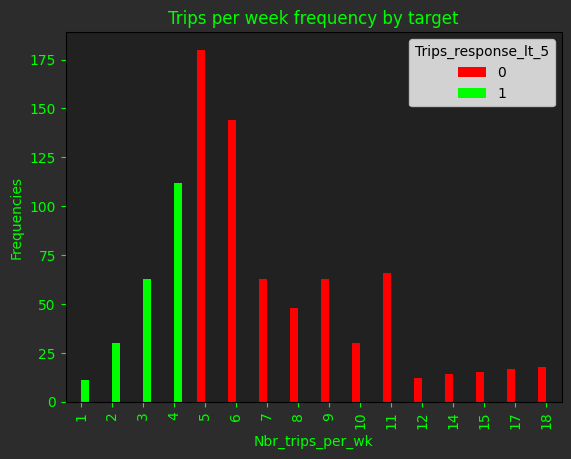

In [27]:
# plotting the above for visual illustration
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Trips_per_week_.plot(ax=ax,
                kind='bar', 
                ylabel='Frequencies',
                title='Trips per week frequency by target', 
                color=['red','lime'])
plt.show()

<h1 style="color: green;">Creating part of the day features</h1>

In [28]:
# extract the time of day as morning, afternoon, evening etc
Receipt_Payment['hour'] = Receipt_Payment['Receipt_Time'].apply(lambda x: x.hour)

bins_= [0,7,11,17,20,23]
lbl = ['Early','Morning','Afternoon','Evening','Late_night']

Receipt_Payment['Part_of_day'] = pd.cut(Receipt_Payment['hour'],bins=bins_, labels=lbl, include_lowest=True)


In [29]:
Receipt_Payment[['Receipt_Time', 'hour','Part_of_day']].tail()

Receipt_Time  hour Part_of_day
878     10:24:00    10     Morning
876     08:32:14     8     Morning
900     12:16:00    12   Afternoon
901     10:14:00    10     Morning
902     16:14:14    16   Afternoon

In [30]:
# Checking the frequencies of part of day
y = Receipt_Payment.Part_of_day.value_counts(normalize=True)
y

Afternoon     0.495485
Morning       0.326185
Evening       0.121896
Early         0.031603
Late_night    0.024831
Name: Part_of_day, dtype: float64

<h5 style="color: green;">Merging item data</h5>

In [31]:
# merging item to Receipt_Payment
raw0 = pd.merge(Receipt_Payment,
                     Item[['Receipt_id','Item_id','Item_name','Item_Price']], 
                     on='Receipt_id', 
                     how='left' )

In [32]:
raw0.head()

Receipt_id  Venue_id  Total_Nbr_of_Items  Total_Price Receipt_Nbr  \
0          99        12                   1        10.89           0   
1         100        12                   1         2.98           0   
2         101        12                   1         3.29           0   
3         146        10                   1        10.00           0   
4         103        12                   1         2.09           0   

  Trans_number         Barcode Receipt_Date Receipt_Time          Date_Added  \
0            0  25-03894-02600   2019-09-20     11:24:00 2020-11-02 17:23:49   
1            0  05-03896-06921   2019-09-20     13:10:00 2020-11-02 17:34:49   
2            0  05-03896-06922   2019-09-20     13:10:00 2020-11-02 17:45:31   
3            0               0   2019-09-25     08:00:00 2020-12-17 10:17:41   
4            0  20-03919-91257   2019-09-26     12:05:00 2020-11-02 21:18:29   

   ... Total_Exp_wk_perc AVG_exp_item_per_wk Trips_response_lt_4  \
0  ...          0.634615              5.7200                   1   
1  ...          0.173660              5.7200                   1   
2  ...          0.191725              5.7200                   1   
3  ...          0.348554              7.1725                   0   
4  ...          0.072848              7.1725                   0   

   Trips_response_lt_5  Trips_response_lt_6 hour Part_of_day  Item_id  \
0                    1                    1   11     Morning      693   
1                    1                    1   13   Afternoon      694   
2                    1                    1   13   Afternoon      695   
3                    1                    1    8     Morning      901   
4                    1                    1   12   Afternoon      697   

                     Item_name  Item_Price  
0   Fan Heater electric cooler       10.89  
1      Iron wire silver 1 roll        2.98  
2  Copper wire  round unplated        3.29  
3           Membership Payment       10.00  
4         Dark green iron wire        2.09  

[5 rows x 31 columns]

In [33]:
raw0.shape

(5052, 31)

<h1 style="color: green;">Grouping items and creating new features</h1>

In [34]:
# breads
nots = ['garlic','Ham','Garlic','ham']
ins = ['Bread','bloomer','bread','Bloomer']

raw0['Bread'] = raw0.Item_name.apply(lambda sentence: 1 if any(word in sentence for word in ins) 
                            and not any(word in sentence for word in nots) else 0)

In [35]:
# Check that the bread indicator output
raw0[['Item_name','Item_Price','Bread']].query("Bread == 1").tail()

Item_name  Item_Price  Bread
4938     Bread        0.95      1
4939     Bread        0.95      1
4969     Bread        1.00      1
4990     Bread        1.00      1
4991     Bread        1.00      1

In [36]:
# Cooked meats indicator
not_cook = ['glass','shampoo','water','conditioner','champagne']
cooked_meats = ['chicken pasty Slices twin pack','steak and kidney pasty',
                'chicken cooked','cooked chicken','roast chicken thighs',
                'mackerel','Salmon','pork pies classic','ham',
                'sardines','sausages cocktail','spicy chorizo sausages',
                'sausages rolls','sausage rolls','salami','meatballs']

raw0['Cooked_meats'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                            any(word.lower() in sentence.lower() 
                                                for word in cooked_meats) 
                                            and not any(word.lower() in sentence.lower() 
                                                        for word in not_cook) 
                                            else 0)

In [37]:
# Checking that the cooked meats indicator was created correctly
raw0[['Item_name','Item_Price','Cooked_meats']].query("Cooked_meats==1").head()

Item_name  Item_Price  Cooked_meats
22  Ham breaded lean        1.39             1
36   Ham cooked lean        1.39             1
50   Ham cooked lean        1.39             1
64  Ham smoked/honey        1.39             1
71   Ham cooked lean        1.39             1

In [38]:
# Raw meats indicator
not_raw = ['pasty','cooked','roast','seasoning',
           'southern','fried','meal','piece',
           'box','bake','szechuan','pies',
           'mushroom','pie','salami','rolls','cocktails',
           'chips','chorizo']
raw_meats = ['bacon','chicken','lamb','gammon','sausages',
             'sausage','pork','fish','beef','eggs']

raw0['Raw_meats'] = raw0.Item_name.apply(lambda sentence: 1 if any(word.lower() in sentence.lower() for word in raw_meats) 
                            and not any(word.lower() in sentence.lower() for word in not_raw) else 0)


In [39]:
raw0[['Item_name','Item_Price','Raw_meats']].query("Raw_meats==1").tail()

Item_name  Item_Price  Raw_meats
5046    Chicken soup        0.45          1
5047    Chicken soup        0.45          1
5048    Chicken soup        0.45          1
5050  Chicken thighs        3.14          1
5051  Chicken thighs        3.14          1

In [40]:
# Creating eating out indicator using the restaurants and fastfoods Venue id
eating_out = [11,20,25,31,34,35,40,41,42,48]
raw0['Eating_out'] = raw0.apply(lambda x: 1 if x['Venue_id'] in eating_out or 
                                         x['Item_name'] in ['Food @ space centre',
                                                         'Drinks @ space centre'] 
                                         else 0,axis=1)

In [41]:
raw0[['Venue','Item_name','Item_Price','Eating_out']].query("Eating_out==1").tail()

Venue              Item_name  Item_Price  Eating_out
4425   KFC  Bargain bucket: 14 pc       21.99           1
4426   KFC         4 mini fillets        4.00           1
4427   KFC     Tango 1.5 l bottle        2.79           1
4428   KFC  Oreo biscuit krushems        2.39           1
4429   KFC  Oreo biscuit krushems        2.39           1

In [42]:
# Creating snack indicator
not_snack = ['diesel','james']
snacks = ['snickers','digestive','digestives',
          'chocolate','yogurt','cake','cakes',
          'snack','nuts','donuts','doughnut',
          'mikati','fudge','maltesers','twix','marmalade',
          'jam','custard']

raw0['Snacks'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                      any(word.lower() in sentence.lower() for word in snacks)
                                      and not 
                                      any(word.lower() in sentence.lower() for word in not_snack)
                                     else 0)

In [43]:
raw0[['Item_name','Item_Price','Snacks']].query("Snacks==1").tail()

Item_name  Item_Price  Snacks
4994              Custard        0.50       1
4995              Custard        0.50       1
4996              Custard        0.50       1
5006  Digestive chocolate        0.85       1
5032  Digestive chocolate        0.85       1

In [44]:
# Creating drinks indicator variable
# Note: this includes alcoholic and non alcoholic drinks

not_drink = ['diesel','glass','socks','fan','heater',
             'beef','source','ironing','plaster','ham','lockets']

drinks = ['juice','vimto','ribena','squash','tropical','liquer',
          'dr pepper','coke','alcohol','beer','rubicon','courvoisier'
          'wine','irish','port','rum','original','smoothies','water',
          'honey','cordial','whiskey','whisky']

raw0['Drinks'] = raw0.Item_name.apply(lambda sentence: 1 if any(word.lower() in sentence.lower()
                                                                for word in drinks) 
                                      and not any(word.lower() in sentence.lower() 
                                                  for word in not_drink)
                                     else 0)

In [45]:
raw0[['Item_name','Item_Price','Drinks']].query("Drinks==1").tail()

Item_name  Item_Price  Drinks
4972                    Vimto         3.0       1
5005                    Vimto         3.0       1
5017  Tropical fruit juice 2l         1.6       1
5021                    Vimto         3.0       1
5044                    Vimto         3.0       1

In [46]:
# Creating a vegetables indicator
not_veg = ['seed','bread','fried','black','dr','lisbon']
vegetables = ['cabbage','carrots','parsnip','greens','garlic','ginger',
              'tomatoes','onions','chillies','ngai ngai','leaf',
              'leaves','mushrooms','spinach','coriander','parsley',
              'broccoli','pumpkin','peas','peppers','cucumber','leeks',
             'brussel sprouts','mint','asparagus','beans','Soup']

raw0['Vegetables'] = raw0.Item_name.apply(lambda sentence: 
                                          1 if any(word.lower() in sentence.lower() 
                                                   for word in vegetables)
                                         and not any(word.lower() in sentence.lower() 
                                                     for word in not_veg)
                                         else 0)

In [47]:
raw0[['Item_name','Item_Price','Vegetables']].query("Vegetables==1").head()

Item_name  Item_Price  Vegetables
45  Parsnips 500g        0.57           1
47   Baby spinach        0.99           1
48   Baby spinach        0.99           1
52  Coriander cut        0.39           1
53  Coriander cut        0.39           1

In [48]:
# Creating a fruits indicator
not_fruit = ['juice','rubicon','original','smoothies','yogurt','cordial',
             'ribena','squash','volvic','water','lockets','bucket']
fruit = ['olives','apples','mango','grape','grapes','bananas',
          'lime','lemon','strawberries','oranges']

raw0['Fruit'] = raw0.Item_name.apply(lambda sentence: 1 if any(word.lower() in sentence.lower() 
                                                               for word in fruit) 
                                     and not any(word.lower() in sentence.lower() 
                                                 for word in not_fruit)
                                    else 0)

In [49]:
raw0[['Item_name','Item_Price','Fruit']].query("Fruit==1").tail()

Item_name  Item_Price  Fruit
4770  Loose mango        1.69      1
4810        Limes        1.00      1
4811       Lemons        0.55      1
5028        Limes        1.00      1
5029       Lemons        0.55      1

In [50]:
# Creating an indicator for cooking base
not_base = ['fried']
cooking_base = ['pasta','spaghetti','rice','flour','potatoe','potatoes','potato']

raw0['Cooking_base'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                            any(word.lower() in sentence.lower() 
                                                for word in cooking_base) 
                                            and not any(word.lower() in sentence.lower() 
                                                        for word in not_base) 
                                            else 0)

In [51]:
raw0[['Item_name','Item_Price','Cooking_base']].query("Cooking_base==1").tail()

Item_name  Item_Price  Cooking_base
4055  Easy cook rice 10kg       10.49             1
4154               Potato        0.15             1
4209        Loose potatoe        0.15             1
4414             Potatoes        0.22             1
4788  Easy cook rice 10kg       13.99             1

In [52]:
# Creating an indicator for Dairy produce
dairy_produce = ['cheese','brilliantly','butter','butterlicious','spread','margarine']
raw0['Dairy_produce'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                             any(word.lower() in sentence.lower() 
                                                 for word in dairy_produce) 
                                             else 0)

In [53]:
raw0[['Item_name','Item_Price','Dairy_produce']].query("Dairy_produce==1").tail()

Item_name  Item_Price  Dairy_produce
4949  Cheese spread        1.25              1
4950  Cheese spread        1.25              1
4973    Soft cheese        1.25              1
4988  Cheese spread        1.25              1
4989  Cheese spread        1.25              1

In [54]:
# Creating an indicator for seasoning
seasoning = ['black pepper','salt','seasoning','spice','cinnamon','paprika']

raw0['Seasoning'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                         any(word.lower() in sentence.lower() 
                                             for word in seasoning) 
                                         else 0 )

In [55]:
raw0[['Item_name','Item_Price','Seasoning']].query("Seasoning==1").tail()

Item_name  Item_Price  Seasoning
4346  EE Jerk seasoning        0.59          1
4347  EE Jerk seasoning        0.59          1
4789       Black pepper        1.25          1
4902       Black pepper        1.25          1
5014       Black pepper        2.60          1

In [56]:
# creating an indicator for breakfast food
breakfast = ['granola','muesli','sultanas','Porridge']

raw0['Breakfast'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                         any(word.lower() in sentence.lower() 
                                             for word in breakfast) 
                                         else 0 )

In [57]:
raw0[['Receipt_id','Venue','Item_name','Item_Price','Breakfast']].query("Breakfast==1").tail()

Receipt_id Venue Item_name  Item_Price  Breakfast
5027         887  Asda  Porridge        0.84          1
5038         913  Asda  Porridge        0.84          1
5039         913  Asda  Sultanas        0.95          1
5040         913  Asda  Sultanas        0.95          1
5041         913  Asda  Sultanas        0.95          1

In [58]:
# Creating an indicator for transport
transport = ['unleaded','diesel','return ticket']
raw0['Transport'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                         any(word.lower() in sentence.lower() 
                                             for word in transport)
                                         else 0)

In [59]:
raw0[['Item_name','Item_Price','Transport']].query("Transport==1").tail()

Item_name  Item_Price  Transport
4422        Diesel 13.16l @ £1.999/l       26.31          1
4430  Victoria station return ticket       37.80          1
4690                   Return ticket        4.00          1
4809                   Return ticket        4.00          1
4936      Loughborough return ticket        4.00          1

In [60]:
# Creating an indicator for diy
not_diy = ['sony']
diy = ['fifty box 44l black','soil scoop','garden glove','compost','carrot amsterdam',
       'cabbage copenhagen','parsnip gladiator','Spring onion white lisbon seed','bucket',
       'onion white ailsa craig seed','dahlia assorted bright seed','gorilla',
       'kaze box','galvanised garden wheelbarrow','magnusson 500mm steel ruler',
       'tape measure','timber','bosch 34 piece drill accessory','wood screw steel',
       'bolted screws set','decking srew csk pz pk500','heavy duty rubble sacks 50l',
       'magnusson screw driver slot 100 x','wiha slotted screw driver 150 x',
       'general purpose plier set 3pc','mag ratchet precision Screwdriver',
       'diall l75 decking screws 250pck','chrome plated barrel latch','wire',
       'satin nickel barrel latch','chrome plated barrel latch',
       'ronseal varnish outdoor clear gloss','zipper metal silver teeth',
       'neodymium magnets']

raw0['DIY'] = raw0.Item_name.apply(lambda sentence: 1 if any(word.lower() in sentence.lower() 
                                                             for word in diy) 
                                   and not any(word.lower() in sentence.lower() 
                                               for word in not_diy) 
                                   else 0)

In [61]:
raw0[['Item_name','Item_Price','DIY']].query("DIY==1").tail()

Item_name  Item_Price  DIY
3480          Heavy duty rubble sacks 50l        7.30    1
3490  Ronseal varnish outdoor clear gloss        8.00    1
3980     FINDMAG 20pack Neodymium magnets       19.99    1
4369                         Gorilla glue        9.98    1
4425                Bargain bucket: 14 pc       21.99    1

In [62]:
# Creating an indicator for electronics
electronics = ['macallister combi drill','macallister multipendulum jigsaw 600w',
               'bench table saw','fan heater','voltmeter','hair clippers wahl',
               'silk steamer','vacuum cleaner','table saw',
               'rotary tool kit','reciprocating saws','air fryer oven']

raw0['Electronics'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                           any(word.lower() in sentence.lower() 
                                               for word in electronics) 
                                           else 0)

In [63]:
raw0[['Item_name','Item_Price','Electronics']].query("Electronics ==1").tail()

Item_name  Item_Price  \
1344                     TACKLIFE 135W Rotary Tool Kit       23.99   
2478  Hoover Whirlwind Bagless Cylinder Vacuum Cleaner       69.00   
2479                 GALAX PRO Reciprocating Saws 20V,       65.99   
2527                              Air fryer oven (23l)      129.99   
3455             Macallister multipendulum jigsaw 600w       25.00   

      Electronics  
1344            1  
2478            1  
2479            1  
2527            1  
3455            1

In [64]:
# creating an indicator for education
not_edu = ['clevo']
education = ['King Richard Williams','linkedin','mysql','financial','python',
             'bootcamp','web server','linux','apache','sas','pencils',
             'eraser','WHS 15cm ruler','bic pen','a4','binders','feature', 
             'engineering','full stack', 'optimization','machine learning',
             'tensor flow','pytorch','statistics','hadoop','sas', 'regression',
             'bootcamp','javascript','research methodology','quantitative']

raw0['Education'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                         any(word.lower() in sentence.lower() 
                                             for word in education) 
                                         and not 
                                         any(word.lower() in sentence.lower() 
                                             for word in not_edu) 
                                         else 0)

In [65]:
raw0[['Item_name','Item_Price','Education']].query("Education==1").tail()

Item_name  Item_Price  Education
5010  Complete Linux Training Course to Get Your Dre...       10.99          1
5011             Feature Selection for Machine Learning       19.99          1
5012           Feature Engineering for Machine Learning       14.99          1
5013                          Full Stack Data Scientist       10.99          1
5035   Hyperparameter Optimization for Machine Learning       10.99          1

In [66]:
# Creating an indicator for tech and services
tech_and_services = ['macbook pro','flash drive','lonovo','sony','clevo','tesco','domain registration',
                     'membership payment','Headphones']

raw0['Tech_and_services'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                                 any(word.lower() in sentence.lower() 
                                                     for word in tech_and_services) 
                                                 else 0)

In [67]:
raw0[['Item_name','Item_Price','Tech_and_services']].query("Tech_and_services==1").tail()

Item_name  Item_Price  Tech_and_services
4582  Tesco mobile new Iphone & contract       48.99                  1
4711  Tesco mobile new Iphone & contract       48.99                  1
4771                          Headphones        7.99                  1
4859  Tesco mobile new Iphone & contract       48.99                  1
4956  Tesco mobile new Iphone & contract       48.99                  1

In [68]:
# Creating an indicator for cosmetics and self care

not_cosmetic = ['sony']
cosmetics_and_selfcare = ['shampoo','shower','tooth','colgate','wisdom','nivea',
                          'razor','body','blades','aqueous','shave','african',
                          'perfume','brut','roll on','Roll-on','bettina bath']

raw0['Cosmetics_and_selfcare'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                                      any(word.lower() in sentence.lower() 
                                                          for word in cosmetics_and_selfcare) 
                                                      and not 
                                                      any(word.lower() in sentence.lower() 
                                                          for word in not_cosmetic) 
                                                      else 0)

In [69]:
raw0[['Item_name','Item_Price',
      'Cosmetics_and_selfcare']].query("Cosmetics_and_selfcare == 1").tail()

Item_name  Item_Price  Cosmetics_and_selfcare
4750                  Toothpaste        2.00                       1
4751                  Shower gel        1.90                       1
4872                  Shower gel        1.90                       1
4954  Original source shower gel        2.19                       1
5033                     Colgate        1.00                       1

In [70]:
# Creating an indicator for clothes and shoes
not_clothes_or_shoes = ['bootstrap','web']
clothes_and_shoes = ['lonsdale','slaz','trainers','addidas','puma','sondico','nike',
                     'umbrella','trousers','socks','shirt','boxers','gloves','boots',
                     'insoles']
raw0['Clothes_and_shoes'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                                 any(word.lower() in sentence.lower() 
                                                     for word in clothes_and_shoes)
                                                 and not
                                                 any(word.lower() in sentence.lower()
                                                    for word in not_clothes_or_shoes)
                                                 else 0)

In [71]:
raw0[['Item_name','Item_Price','Clothes_and_shoes']].query("Clothes_and_shoes==1").tail()

Item_name  Item_Price  Clothes_and_shoes
4182  Slazenger jogging bottoms         8.5                  1
4304                   Umbrella         5.0                  1
4415          Stag socks 5 pack        14.0                  1
4786              Black T-shirt         2.5                  1
4803                   Umbrella         5.5                  1

In [72]:
# creating an indicator for house and kitchen 
not_house = ['cake']
house_and_kitchen = ['fairy liquid','measure jug','fitted bed sheet','glass',
                     'turner (spatula)','rolling pin','fairy liquid','orange citrus',
                     'turkey baster','dish drainer','extension lead','grater','power spray',
                     'liquid','roaster and rack','kitchen roller','salad tongs',
                     'strainer 12cm','arial pods','metal scourer','bathmat','curtain hooks',
                     'ant killer spray','scouring pads','sponge','surf','foil','plaster',
                     'knife sharpener','electric hand mixer','athena cotton wool','mop',
                     'ofargo']

raw0['House_and_kitchen'] = raw0.Item_name.apply(lambda sentence: 1 if 
                                                 any(word.lower() in sentence.lower() 
                                                     for word in house_and_kitchen) 
                                                 and not 
                                                 any(word.lower() in sentence.lower() 
                                                     for word in not_house) 
                                                 else 0)

In [73]:
raw0[['Item_name','Item_Price','House_and_kitchen']].query("House_and_kitchen==1").tail()

Item_name  Item_Price  House_and_kitchen
4401   Surf washing powder        5.80                  1
4548     Washing up liquid        3.00                  1
4549         Scouring pads        1.60                  1
4637  Extension lead black       11.00                  1
4968   Surf washing powder        3.99                  1

In [74]:
indicator_list = ['Bread','Cooked_meats','Raw_meats','Eating_out','Snacks','Drinks',
                  'Vegetables','Fruit','Cooking_base','Dairy_produce','Seasoning',
                  'Breakfast','Transport','DIY','Electronics','Education',
                  'Tech_and_services','Cosmetics_and_selfcare','Clothes_and_shoes',
                  'House_and_kitchen']

# Looping through the indicator list to derive new features
for x in indicator_list:
    # Calculate item x count by shopping trip(Receipt) and by week
    raw0["{}_receipt".format(x)] = raw0.groupby(['Receipt_id'])[x].transform('sum')
    raw0["{}_wk".format(x)] = raw0.groupby(['week_of_year'])[x].transform('sum')

    # Receipt item x as a proportion of week's item x
    raw0["{}_wk_perc".format(x)] = raw0["{}_receipt".format(x)] / raw0["{}_wk".format(x)]

    # Calculating item x expenditure by shopping trip(Receipt) and by week
    raw0["{}_exp_receipt".format(x)] = \
    raw0.query("{}==1".format(x)).groupby(['Receipt_id',x])['Item_Price'].transform('sum')
    
    raw0["{}_exp_wk".format(x)] = \
    raw0.query("{}==1".format(x)).groupby(['week_of_year',x])['Item_Price'].transform('sum')
    
    # Receipt item x expenditure as a proportion of week's item x expenditure
    raw0["{}_wk_exp_perc".format(x)] = \
    raw0["{}_exp_receipt".format(x)] / raw0["{}_exp_wk".format(x)]

<h1 style="color: green;">Filling in missing values</h1>

In [75]:
# Filling in the single missing value for Date_diff
raw0['Date_diff'].fillna(0,inplace=True)
raw0[['Receipt_Date','Date_diff','Week_day_name','Week_day_numeric','week_of_year']].head()

Receipt_Date  Date_diff Week_day_name  Week_day_numeric week_of_year
0   2019-09-20        0.0        Friday                 5      2019_38
1   2019-09-20        0.0        Friday                 5      2019_38
2   2019-09-20        0.0        Friday                 5      2019_38
3   2019-09-25        5.0     Wednesday                 3      2019_39
4   2019-09-26        1.0      Thursday                 4      2019_39

In [76]:
# Retrieve subsets of the features to get display raw1.info
x = raw0.columns
raw0[x[:60]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5052 entries, 0 to 5051
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Receipt_id              5052 non-null   int64         
 1   Venue_id                5052 non-null   int64         
 2   Total_Nbr_of_Items      5052 non-null   int64         
 3   Total_Price             5052 non-null   float64       
 4   Receipt_Nbr             5052 non-null   object        
 5   Trans_number            5052 non-null   object        
 6   Barcode                 5052 non-null   object        
 7   Receipt_Date            5052 non-null   datetime64[ns]
 8   Receipt_Time            5052 non-null   object        
 9   Date_Added              5052 non-null   datetime64[ns]
 10  Venue                   5052 non-null   object        
 11  Payment_Type            5052 non-null   object        
 12  Card_Source             5052 non-null   object  

In [77]:
# Filling in missing values from the check above

# The analysis is done at receipt level, not at item level
# so the summaries of interest are at receipt level
# if at receipt level there is a missing value this value is
# filled by summing over the item level values

# i.e. to get the receipt level data, we will retrieve the first row
# for the respective receipt which would contain only the first item values
# instead we groupby receipt and the feature of interest to get that summary value
# over all receipt item of interest.

# example: Receipt has only 5 tomatoe 6 packs for vegetables
# row 1: 1 tomatoe 6 packs, row 2: 1 tomatoe 6 packs, row 3: 1 tomatoe 6 packs ...
# number of Vegetables_receipt is 5

fill_na_list = ['Bread_wk_perc','Bread_exp_receipt','Bread_exp_wk',
             'Bread_wk_exp_perc','Cooked_meats_receipt','Cooked_meats_wk','Cooked_meats_wk_perc','Cooked_meats_exp_receipt',
             'Cooked_meats_exp_wk','Raw_meats_receipt','Raw_meats_wk','Raw_meats_wk_perc','Raw_meats_exp_receipt',
             'Raw_meats_exp_wk','Raw_meats_wk_exp_perc','Eating_out_receipt','Eating_out_wk','Eating_out_wk_perc',
             'Eating_out_exp_receipt','Eating_out_exp_wk','Eating_out_wk_exp_perc','Snacks_receipt','Snacks_wk',
             'Snacks_wk_perc','Snacks_exp_receipt','Snacks_exp_wk','Snacks_wk_exp_perc','Drinks_receipt','Drinks_wk',
             'Drinks_wk_perc','Drinks_exp_receipt','Drinks_exp_wk','Drinks_wk_exp_perc','Vegetables_receipt',
             'Vegetables_wk','Vegetables_wk_perc','Vegetables_exp_receipt','Vegetables_exp_wk','Vegetables_wk_exp_perc',
             'Fruit_receipt','Fruit_wk','Fruit_wk_perc','Fruit_exp_receipt','Fruit_exp_wk','Fruit_wk_exp_perc',
             'Cooking_base_receipt','Cooking_base_wk','Cooking_base_wk_perc','Cooking_base_exp_receipt','Cooking_base_exp_wk',
             'Cooking_base_wk_exp_perc','Dairy_produce_receipt','Dairy_produce_wk','Dairy_produce_wk_perc',
             'Dairy_produce_exp_receipt','Dairy_produce_exp_wk','Dairy_produce_wk_exp_perc','Seasoning_receipt',
             'Seasoning_wk','Seasoning_wk_perc','Seasoning_exp_receipt','Seasoning_exp_wk','Seasoning_wk_exp_perc',
             'Breakfast_receipt','Breakfast_wk','Breakfast_wk_perc','Breakfast_exp_receipt','Breakfast_exp_wk',
             'Breakfast_wk_exp_perc','Transport_wk','Transport_wk_perc','Transport_exp_receipt','Transport_exp_wk',
             'Transport_wk_exp_perc','DIY_receipt','DIY_wk','DIY_wk_perc','DIY_exp_receipt','DIY_exp_wk','DIY_wk_exp_perc',
             'Electronics_receipt','Electronics_wk','Electronics_wk_perc','Electronics_exp_receipt','Electronics_exp_wk',
             'Electronics_wk_exp_perc','Education_receipt','Education_wk','Education_wk_perc','Education_exp_receipt',
             'Education_exp_wk','Education_wk_exp_perc','Tech_and_services_receipt','Tech_and_services_wk',
             'Tech_and_services_wk_perc','Tech_and_services_exp_receipt','Tech_and_services_exp_wk',
             'Tech_and_services_wk_exp_perc','Cosmetics_and_selfcare_receipt','Cosmetics_and_selfcare_wk',
             'Cosmetics_and_selfcare_wk_perc','Cosmetics_and_selfcare_exp_receipt','Cosmetics_and_selfcare_exp_wk',
             'Cosmetics_and_selfcare_wk_exp_perc','Clothes_and_shoes_receipt','Clothes_and_shoes_wk',
             'Clothes_and_shoes_wk_perc','Clothes_and_shoes_exp_receipt','Clothes_and_shoes_exp_wk',
             'Clothes_and_shoes_wk_exp_perc','House_and_kitchen_receipt','House_and_kitchen_wk',
             'House_and_kitchen_wk_perc','House_and_kitchen_exp_receipt','House_and_kitchen_exp_wk',
             'House_and_kitchen_wk_exp_perc']

for x in fill_na_list:
    y = raw0.groupby(['Receipt_id'])[x].transform('sum')
    raw0[x]= raw0.groupby(['Receipt_id'])[x].apply(lambda x: x.fillna(y))

In [78]:
# Rechecking subsets of the features to get display raw1.info
# x = raw0.columns
# raw0[x[122:]].info()

<h1 style="color: green;">Restricting the data to Receipt for modeling</h1>
<p style="color: black;">
The model will be ran at Receipt(shopping trip) level data using the summarised indicator<br>
features, payment data in additions to the original Receipt data.
</p>

In [79]:
raw1 = raw0.drop_duplicates(subset=['Receipt_id'])

In [80]:
print("raw0 shape: {}\nraw1 shape: {}".format(raw0.shape, raw1.shape))

raw0 shape: (5052, 171)
raw1 shape: (886, 171)


<h1 style="color: green;">Exporting raw data</h1>

In [81]:
raw1.to_csv("../Data/homeshopping.csv",index=False)